# scikit-learn 使用基础

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()  # 加载数据

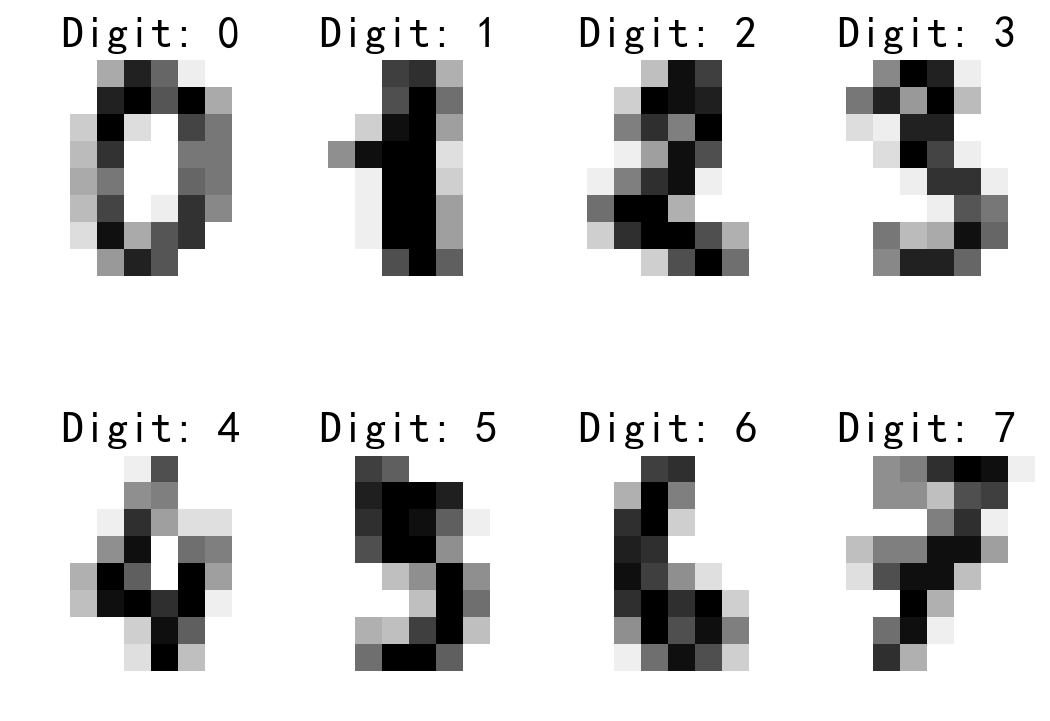

In [3]:
# 把数据所代表的图片显示出来
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(8, 6), dpi=80)
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: {}'.format(label), fontsize=20)
    # plt.title('Digit: %i' % label, fontsize=20)

In [4]:
print("shape of raw image data: {0}".format(digits.images.shape))
print("shape of data: {0}".format(digits.data.shape))

shape of raw image data: (1797, 8, 8)
shape of data: (1797, 64)


In [5]:
# 把数据分成训练数据集和测试数据集
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    digits.data, digits.target, test_size=0.20, random_state=2)

In [6]:
# 使用支持向量机来训练模型
from sklearn import svm

# 让支持向量机可以预测概率
clf = svm.SVC(gamma=0.001, C=100., probability=True)
clf.fit(X_train, Y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
# 评估模型的准确度
from sklearn.metrics import accuracy_score

Y_pred = clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9777777777777777

In [8]:
clf.score(X_test, Y_test)

0.9777777777777777

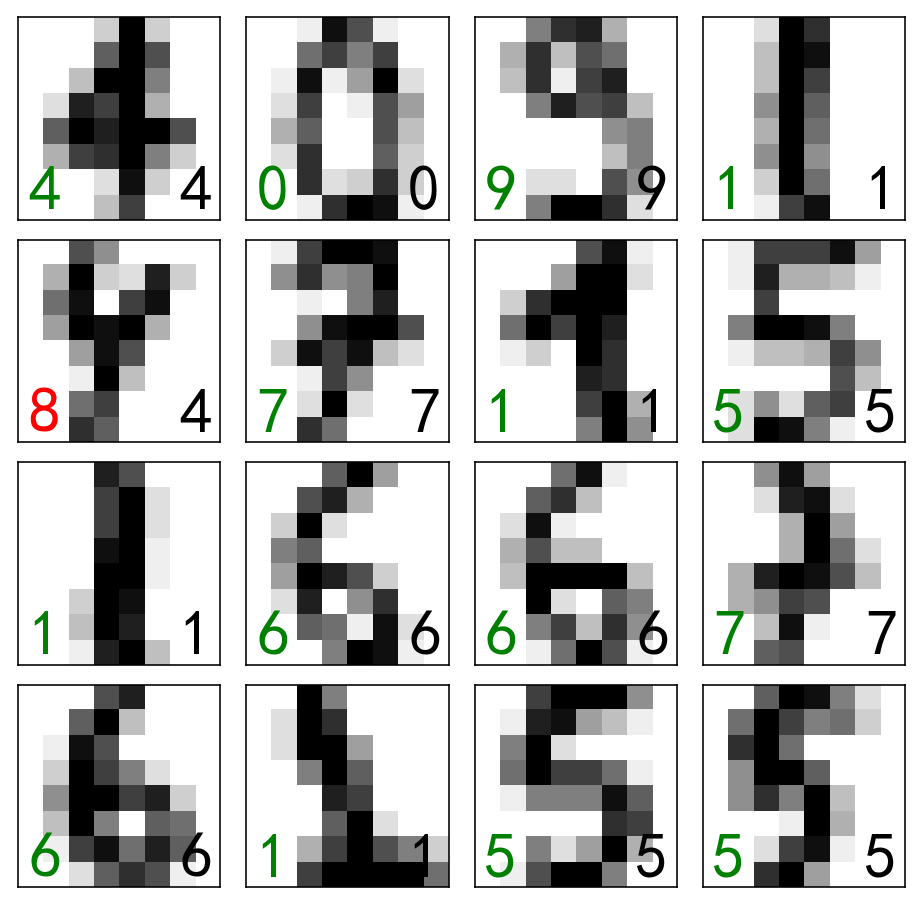

In [9]:
# 查看预测的情况
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
# 设置组图的水平间距和垂直间距
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(
        X_test[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.text(
        0.05,
        0.05,
        str(Y_pred[i]),
        fontsize=32,
        transform=ax.transAxes,
        color='green' if Y_pred[i] == Y_test[i] else 'red')
    ax.text(
        0.8,
        0.05,
        str(Y_test[i]),
        fontsize=32,
        transform=ax.transAxes,
        color='black')
    # 把坐标轴上的刻度线都去掉
    ax.set_xticks([])
    ax.set_yticks([])

In [10]:
# Xtest[4] 的各种可能性，因为这是预测概率
clf.predict_proba(X_test[4].reshape(1, -1))

array([[0.00483744, 0.02524362, 0.01646232, 0.01186538, 0.03391706,
        0.03208295, 0.00549932, 0.17058944, 0.55003032, 0.14947213]])

## 保存模型

In [11]:
# 保存模型参数
from sklearn.externals import joblib

joblib.dump(clf, 'digits_svm.pkl')

['digits_svm.pkl']

## 加载模型

In [12]:
# 导入模型参数，直接进行预测
clf = joblib.load('digits_svm.pkl')
Ypred = clf.predict(X_test)
clf.score(X_test, Y_test)

0.9777777777777777